### Assignment-Statistics for ML by Usman Ghulam Nabi (W-53)

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import shapiro


## Read Car_Sales.csv Data

In [3]:
df= pd.read_csv('Car_sales.csv')

### Shape of Data

In [4]:
df.shape

(157, 16)

In [5]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Let's Explore the data

In [6]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Basic information about the dataset and data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Prior to summary statistics, identify missing values or duplicates and drop them.

### Missing values

In [8]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

## Check Duplicates

In [9]:
df.duplicated().sum()

0

### Keep only numeric columns in a dataframe 

hint: (use function select_dtype)

In [10]:
ndf = df.select_dtypes(include ='number')

### Summary statistics

In [11]:
ndf.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


## Distribution

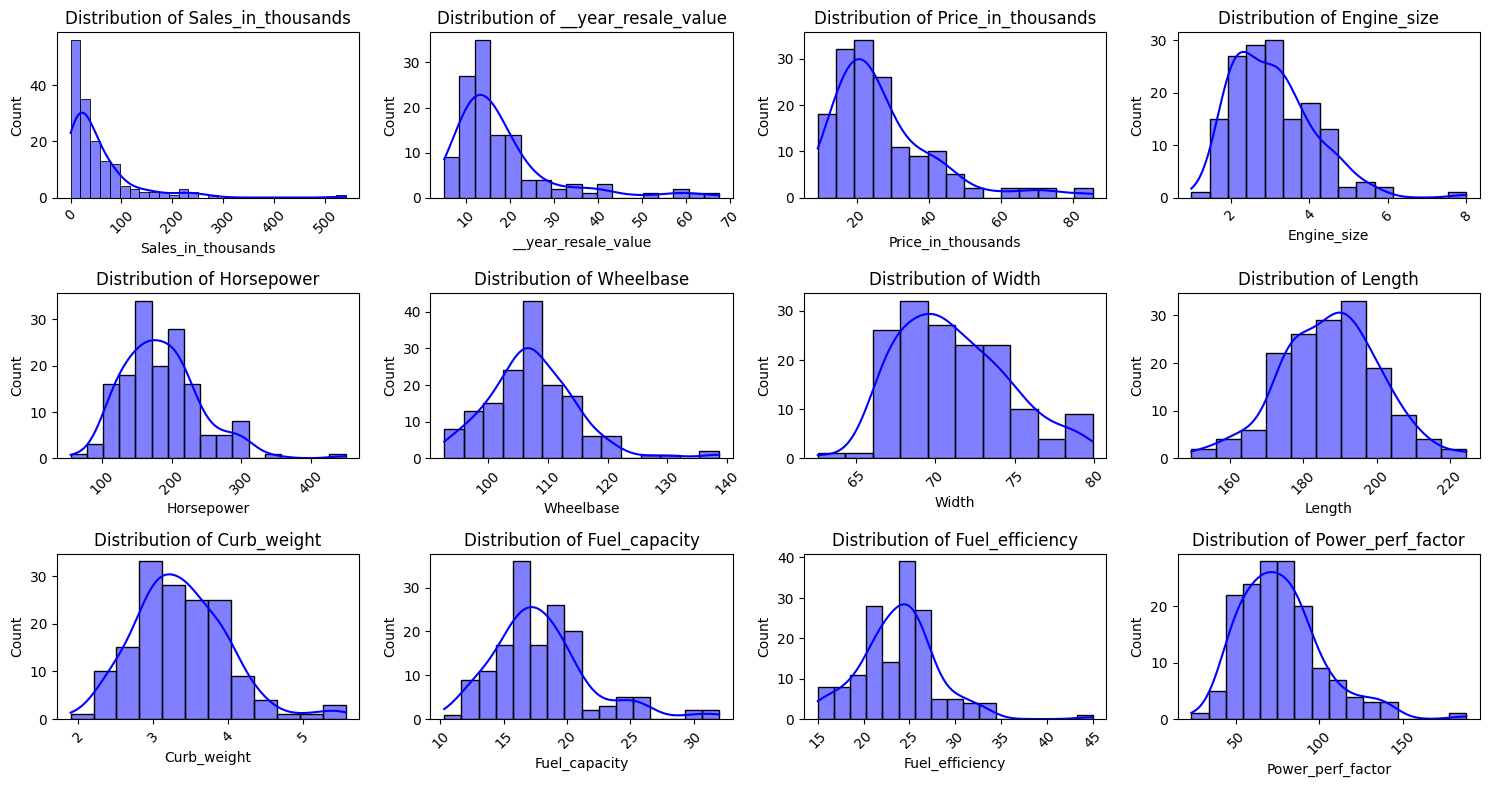

In [12]:
plt.figure(figsize=(15, 10))

# Iterate through each column in ndf and plot on a separate subplot
for i, column in enumerate(ndf.columns):
    plt.subplot(4, 4, i+1)  # Adjust the subplot layout based on the number of columns in ndf
    sns.histplot(ndf[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Normalized Distribution (Gaussian)

In [13]:

# Assuming your DataFrame is named 'ndf'

# Perform Shapiro-Wilk test for each column
normality_results = {}
for column in ndf.columns:
    stat, p = shapiro(ndf[column].dropna())
    normality_results[column] = {'Stat': stat, 'p-value': p, 'Normal?': p > 0.05}

# Display the results
for column, result in normality_results.items():
    print(f"Column: {column}, Stat: {result['Stat']}, p-value: {result['p-value']}, Normal? {result['Normal?']}")


Column: Sales_in_thousands, Stat: 0.6670734414583078, p-value: 2.2534253988052156e-17, Normal? False
Column: __year_resale_value, Stat: 0.7451113955238742, p-value: 3.2935226145501067e-13, Normal? False
Column: Price_in_thousands, Stat: 0.8382944044569947, p-value: 8.580589791208027e-12, Normal? False
Column: Engine_size, Stat: 0.9296542044590367, p-value: 6.102534573713456e-07, Normal? False
Column: Horsepower, Stat: 0.9493702590004158, p-value: 2.020232127529988e-05, Normal? False
Column: Wheelbase, Stat: 0.9447466310215669, p-value: 8.399297034797419e-06, Normal? False
Column: Width, Stat: 0.967731670870405, p-value: 0.001028559861257355, Normal? False
Column: Length, Stat: 0.9934373789019616, p-value: 0.7041136971131705, Normal? True
Column: Curb_weight, Stat: 0.9677757402004808, p-value: 0.001087690024077979, Normal? False
Column: Fuel_capacity, Stat: 0.9258999564655589, p-value: 3.340886048901789e-07, Normal? False
Column: Fuel_efficiency, Stat: 0.95035427294329, p-value: 2.75715

## Skewed Distribution (negative and positive)


In [14]:
# Assuming your DataFrame is named 'ndf'

# Compute skewness for each column
skewness = ndf.skew()

# Determine skewness type for each column
skewness_type = {}
for column, skew in skewness.items():
    if skew > 0:
        skewness_type[column] = "Positively Skewed"
    elif skew < 0:
        skewness_type[column] = "Negatively Skewed"
    else:
        skewness_type[column] = "Approximately Symmetric"

# Display the results
for column, skew_type in skewness_type.items():
    print(f"Column: {column}, Skewness Type: {skew_type}")


Column: Sales_in_thousands, Skewness Type: Positively Skewed
Column: __year_resale_value, Skewness Type: Positively Skewed
Column: Price_in_thousands, Skewness Type: Positively Skewed
Column: Engine_size, Skewness Type: Positively Skewed
Column: Horsepower, Skewness Type: Positively Skewed
Column: Wheelbase, Skewness Type: Positively Skewed
Column: Width, Skewness Type: Positively Skewed
Column: Length, Skewness Type: Negatively Skewed
Column: Curb_weight, Skewness Type: Positively Skewed
Column: Fuel_capacity, Skewness Type: Positively Skewed
Column: Fuel_efficiency, Skewness Type: Positively Skewed
Column: Power_perf_factor, Skewness Type: Positively Skewed


## Outliers

Plot Boxplot

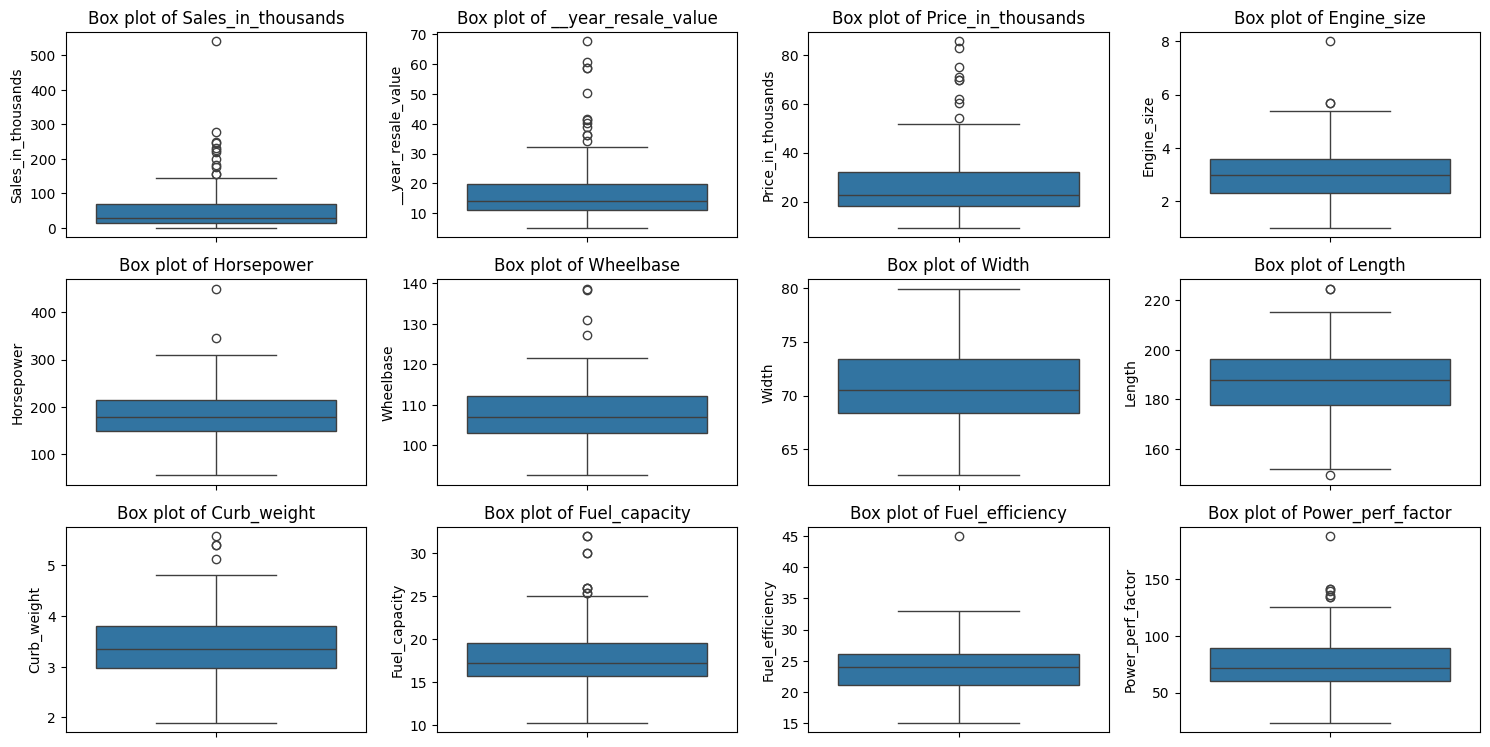

In [15]:
plt.figure(figsize=(15, 10))

# Iterate through each column in ndf and plot on a separate subplot
for i, column in enumerate(ndf.columns):
    plt.subplot(4, 4, i+1)  # Adjust the subplot layout based on the number of columns in ndf
    sns.boxplot(ndf[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Z-score

Detect Outliers using Z-Score. (Set threshold =3)

In [16]:
import numpy as np

# Function to detect outliers using z-score
def detect_outliers_z_score(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return np.where(z_scores > threshold)

# Assuming your DataFrame is named 'ndf'

# Detect outliers for each column
outliers = {}
for column in ndf.columns:
    outlier_indices = detect_outliers_z_score(ndf[column])
    outliers[column] = outlier_indices[0]

# Display the indices of outliers for each column
for column, indices in outliers.items():
    print(f"Outliers in column '{column}': {indices}")


Outliers in column 'Sales_in_thousands': [52 56]
Outliers in column '__year_resale_value': [ 39  95 125 126]
Outliers in column 'Price_in_thousands': [ 95  99 125 126]
Outliers in column 'Engine_size': [39]
Outliers in column 'Horsepower': [39]
Outliers in column 'Wheelbase': [40 43 56]
Outliers in column 'Width': []
Outliers in column 'Length': []
Outliers in column 'Curb_weight': [18 74 78]
Outliers in column 'Fuel_capacity': [18 41 42 78]
Outliers in column 'Fuel_efficiency': [26]
Outliers in column 'Power_perf_factor': [39]


## Remove outliers

In [17]:
import numpy as np

# Function to remove outliers using z-score
def remove_outliers_z_score(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[(z_scores <= threshold).all(axis=1)]

# Assuming your DataFrame is named 'ndf'

# Remove outliers for each column
cdf = ndf.copy()  # Create a copy of the original DataFrame to keep the original data intact
for column in ndf.columns:
    cdf = remove_outliers_z_score(cdf)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(cdf)


Cleaned DataFrame:
     Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0                16.919               16.360              21.500          1.8   
1                39.384               19.875              28.400          3.2   
3                 8.588               29.725              42.000          3.5   
4                20.397               22.255              23.990          1.8   
5                18.780               23.555              33.950          2.8   
8                 9.231               28.675              33.400          2.8   
10               91.561               12.475              21.975          3.1   
11               39.350               13.740              25.300          3.8   
12               27.851               20.190              31.965          3.8   
13               83.257               13.360              27.885          3.8   
14               63.729               22.525              39.895          4.6   
16       

## Distribution Check

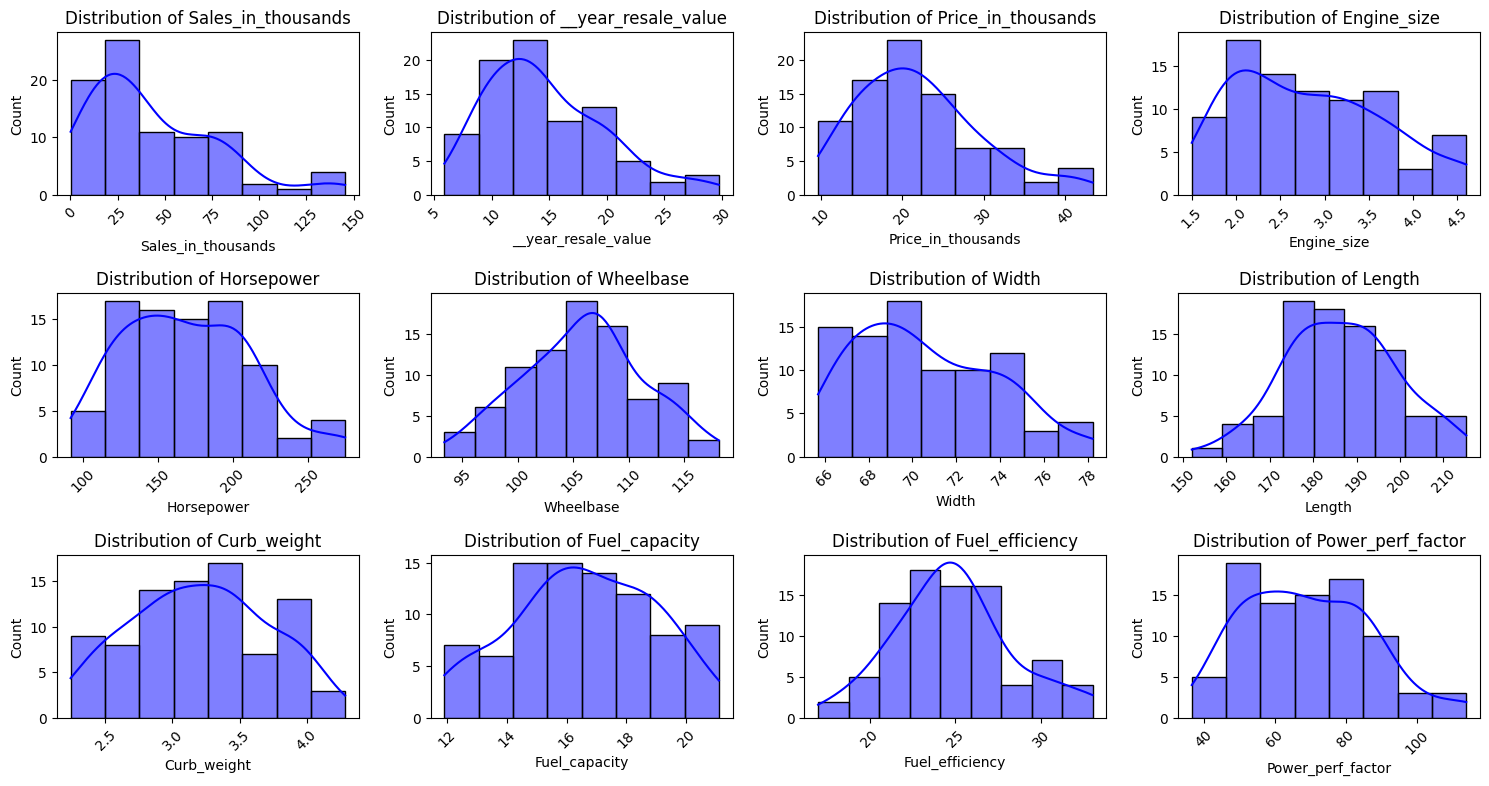

In [18]:
plt.figure(figsize=(15, 10))

# Iterate through each column in ndf and plot on a separate subplot
for i, column in enumerate(cdf.columns):
    plt.subplot(4, 4, i+1)  # Adjust the subplot layout based on the number of columns in ndf
    sns.histplot(cdf[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [19]:
# Assuming your DataFrame is named 'ndf'

# Compute skewness for each column
skewness = cdf.skew()

# Determine skewness type for each column
skewness_type = {}
for column, skew in skewness.items():
    if skew > 0:
        skewness_type[column] = "Positively Skewed"
    elif skew < 0:
        skewness_type[column] = "Negatively Skewed"
    else:
        skewness_type[column] = "Approximately Symmetric"

# Display the results
for column, skew_type in skewness_type.items():
    print(f"Column: {column}, Skewness Type: {skew_type}")


Column: Sales_in_thousands, Skewness Type: Positively Skewed
Column: __year_resale_value, Skewness Type: Positively Skewed
Column: Price_in_thousands, Skewness Type: Positively Skewed
Column: Engine_size, Skewness Type: Positively Skewed
Column: Horsepower, Skewness Type: Positively Skewed
Column: Wheelbase, Skewness Type: Negatively Skewed
Column: Width, Skewness Type: Positively Skewed
Column: Length, Skewness Type: Negatively Skewed
Column: Curb_weight, Skewness Type: Positively Skewed
Column: Fuel_capacity, Skewness Type: Negatively Skewed
Column: Fuel_efficiency, Skewness Type: Positively Skewed
Column: Power_perf_factor, Skewness Type: Positively Skewed


#### Use binning technique to remove Skewness 

In [20]:
# Function to remove skewness using equal-width binning
def remove_skewness_binning(data, num_bins=10):
    # Compute bin edges for each column
    bin_edges = {}
    for column in data.columns:
        column_min = data[column].min()
        column_max = data[column].max()
        bin_edges[column] = np.linspace(column_min, column_max, num_bins + 1)

    # Discretize data into bins and replace original values with bin labels
    for column, edges in bin_edges.items():
        data[column] = pd.cut(data[column], bins=edges, labels=False)

# Apply equal-width binning to remove skewness directly on 'ndf'
remove_skewness_binning(cdf)

# Display the updated DataFrame
print("Updated DataFrame after removing skewness with binning:")
print(cdf)


Updated DataFrame after removing skewness with binning:
     Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0                   1.0                  4.0                 3.0          0.0   
1                   2.0                  5.0                 5.0          5.0   
3                   0.0                  9.0                 9.0          6.0   
4                   1.0                  6.0                 4.0          0.0   
5                   1.0                  7.0                 7.0          4.0   
8                   0.0                  9.0                 7.0          4.0   
10                  6.0                  2.0                 3.0          5.0   
11                  2.0                  3.0                 4.0          7.0   
12                  1.0                  6.0                 6.0          7.0   
13                  5.0                  3.0                 5.0          7.0   
14                  4.0                  6.0         

## Distribution check
To confirm if skewness is removed or not

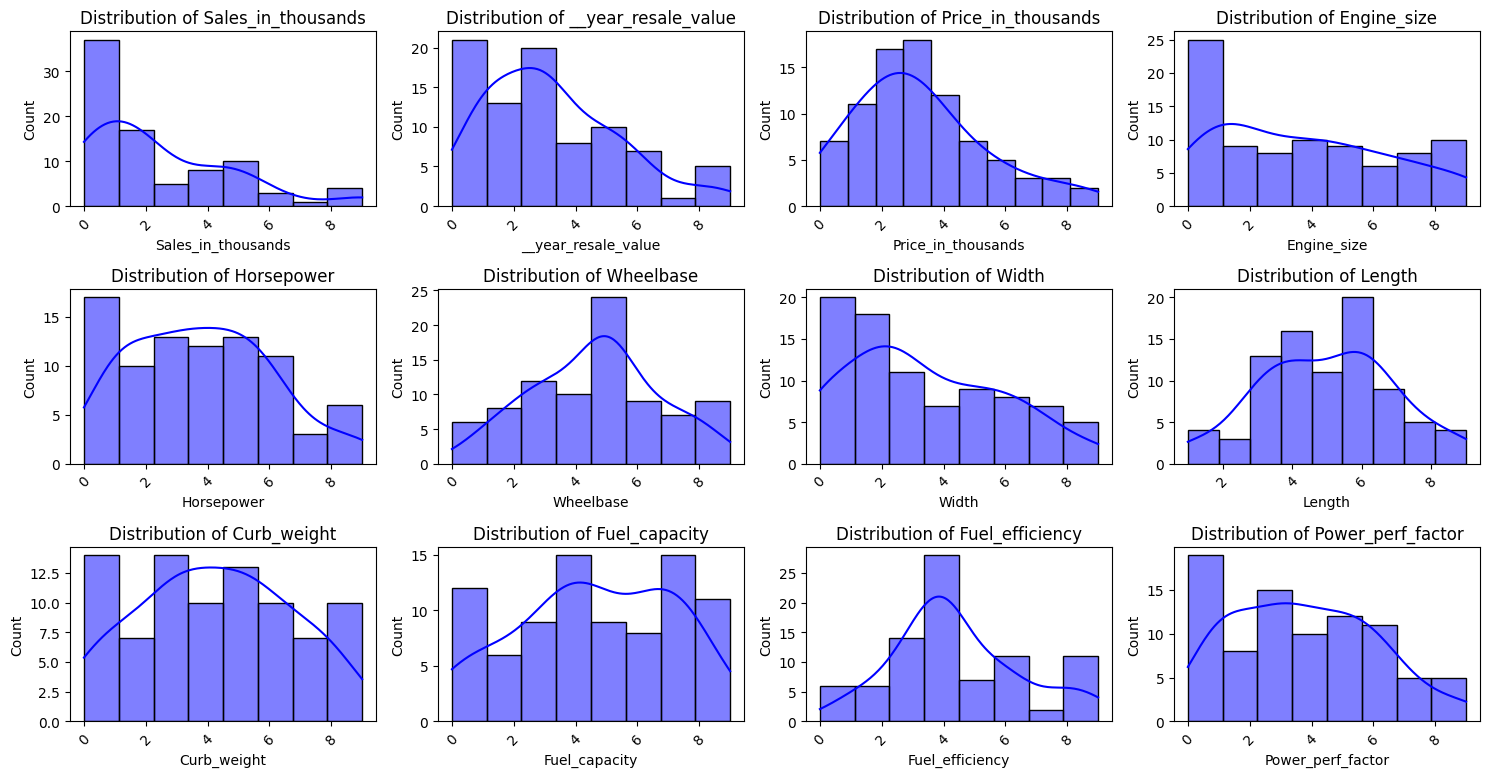

In [21]:
plt.figure(figsize=(15, 10))

# Iterate through each column in ndf and plot on a separate subplot
for i, column in enumerate(cdf.columns):
    plt.subplot(4, 4, i+1)  # Adjust the subplot layout based on the number of columns in ndf
    sns.histplot(cdf[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [22]:
# Compute skewness for each column in the updated DataFrame
skewness_after_binning = cdf.skew()

# Display the skewness before and after binning
print("Skewness before binning:")
print(skewness)

print("\nSkewness after binning:")
print(skewness_after_binning)


Skewness before binning:
Sales_in_thousands     1.098455
__year_resale_value    0.813508
Price_in_thousands     0.773849
Engine_size            0.490269
Horsepower             0.425219
Wheelbase             -0.009810
Width                  0.506542
Length                -0.005384
Curb_weight            0.027250
Fuel_capacity         -0.134410
Fuel_efficiency        0.358942
Power_perf_factor      0.432281
dtype: float64

Skewness after binning:
Sales_in_thousands     1.106160
__year_resale_value    0.747798
Price_in_thousands     0.735271
Engine_size            0.385179
Horsepower             0.346121
Wheelbase              0.011605
Width                  0.432521
Length                 0.005041
Curb_weight            0.017204
Fuel_capacity         -0.205589
Fuel_efficiency        0.463494
Power_perf_factor      0.335345
dtype: float64


### Standardization and Normalization

Apply standardization and normalization on the columns

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## Standardization

In [24]:


# Create a StandardScaler object
scaler = StandardScaler()

# Assuming 'cdf' is your DataFrame and 'Length' is the column to be standardized
length_column = cdf['Length'].values.reshape(-1, 1)  # Reshape to a 2D array for StandardScaler

# Fit the scaler to the length column and transform it
length_standardized = scaler.fit_transform(length_column)

# Convert the standardized array back to a DataFrame
length_standardized_df = pd.DataFrame(length_standardized, columns=['Length'])

# Display the standardized Length column
print("Standardized Length Column:")
print(length_standardized_df)


Standardized Length Column:
      Length
0  -1.036521
1   0.500182
2   1.012416
3  -0.524287
4   0.500182
5  -1.036521
6   0.500182
7   0.500182
8   1.524650
9   1.012416
10  1.524650
11  1.012416
12  0.500182
13 -0.524287
14  0.500182
15  1.012416
16  1.012416
17  0.500182
18 -1.036521
19  0.500182
20  0.500182
21  2.036884
22 -0.012053
23  1.524650
24 -1.036521
25  0.500182
26 -0.012053
27 -1.036521
28 -0.524287
29 -0.012053
30  2.036884
31 -0.524287
32 -0.524287
33  1.012416
34 -1.548755
35 -1.036521
36 -0.012053
37  0.500182
38       NaN
39 -1.548755
40  0.500182
41  1.524650
42  2.036884
43 -1.036521
44 -1.036521
45 -0.012053
46  0.500182
47 -0.524287
48 -0.524287
49 -0.012053
50 -0.012053
51  1.012416
52  2.036884
53  0.500182
54  0.500182
55 -0.524287
56 -0.524287
57 -0.524287
58  0.500182
59  0.500182
60 -0.524287
61  0.500182
62  1.524650
63 -0.524287
64 -1.036521
65 -0.012053
66 -0.012053
67 -0.524287
68 -0.012053
69  0.500182
70  1.012416
71  1.012416
72 -1.036521
73 -0.5242

## Normalization

In [25]:


# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Extract numeric columns excluding 'Length'
numeric_columns = cdf.select_dtypes(include='number').drop(columns=['Length'])

# Fit the scaler to the numeric columns and transform them
numeric_columns_normalized = scaler.fit_transform(numeric_columns)

# Convert the normalized array back to a DataFrame with column names
numeric_columns_normalized_df = pd.DataFrame(numeric_columns_normalized, columns=numeric_columns.columns)

# Concatenate the normalized numeric columns with the 'Length' column
cdf_normalized = pd.concat([cdf['Length'], numeric_columns_normalized_df], axis=1)

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(cdf_normalized)


Normalized DataFrame:


     Length  Sales_in_thousands  __year_resale_value  Price_in_thousands  \
0       3.0            0.111111             0.444444            0.333333   
1       6.0            0.222222             0.555556            0.555556   
3       7.0            0.111111             0.666667            0.444444   
4       4.0            0.111111             0.777778            0.777778   
5       6.0            0.000000             1.000000            0.777778   
8       3.0            0.111111             0.666667            0.666667   
10      6.0            0.444444             0.666667            0.888889   
11      6.0            0.000000             0.888889            0.888889   
12      8.0            0.000000             0.555556            0.666667   
13      7.0            1.000000             0.111111            0.111111   
14      8.0            1.000000             0.222222            0.222222   
16      7.0            0.222222             0.222222            0.222222   
17      6.0 

## Distribution check

In [30]:
# Concatenate 'length_standardized_df' with 'cdf' DataFrame
cdf_normalized = pd.concat([cdf_normalized.drop(columns=['Length']), length_standardized_df], axis=1)

# Display the updated DataFrame
print("Updated DataFrame 'cdf' with standardized 'Length' column:")
print(cdf)


Updated DataFrame 'cdf' with standardized 'Length' column:
     Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0                   1.0                  4.0                 3.0          0.0   
1                   2.0                  5.0                 5.0          5.0   
3                   0.0                  9.0                 9.0          6.0   
4                   1.0                  6.0                 4.0          0.0   
5                   1.0                  7.0                 7.0          4.0   
8                   0.0                  9.0                 7.0          4.0   
10                  6.0                  2.0                 3.0          5.0   
11                  2.0                  3.0                 4.0          7.0   
12                  1.0                  6.0                 6.0          7.0   
13                  5.0                  3.0                 5.0          7.0   
14                  4.0                  6.0      

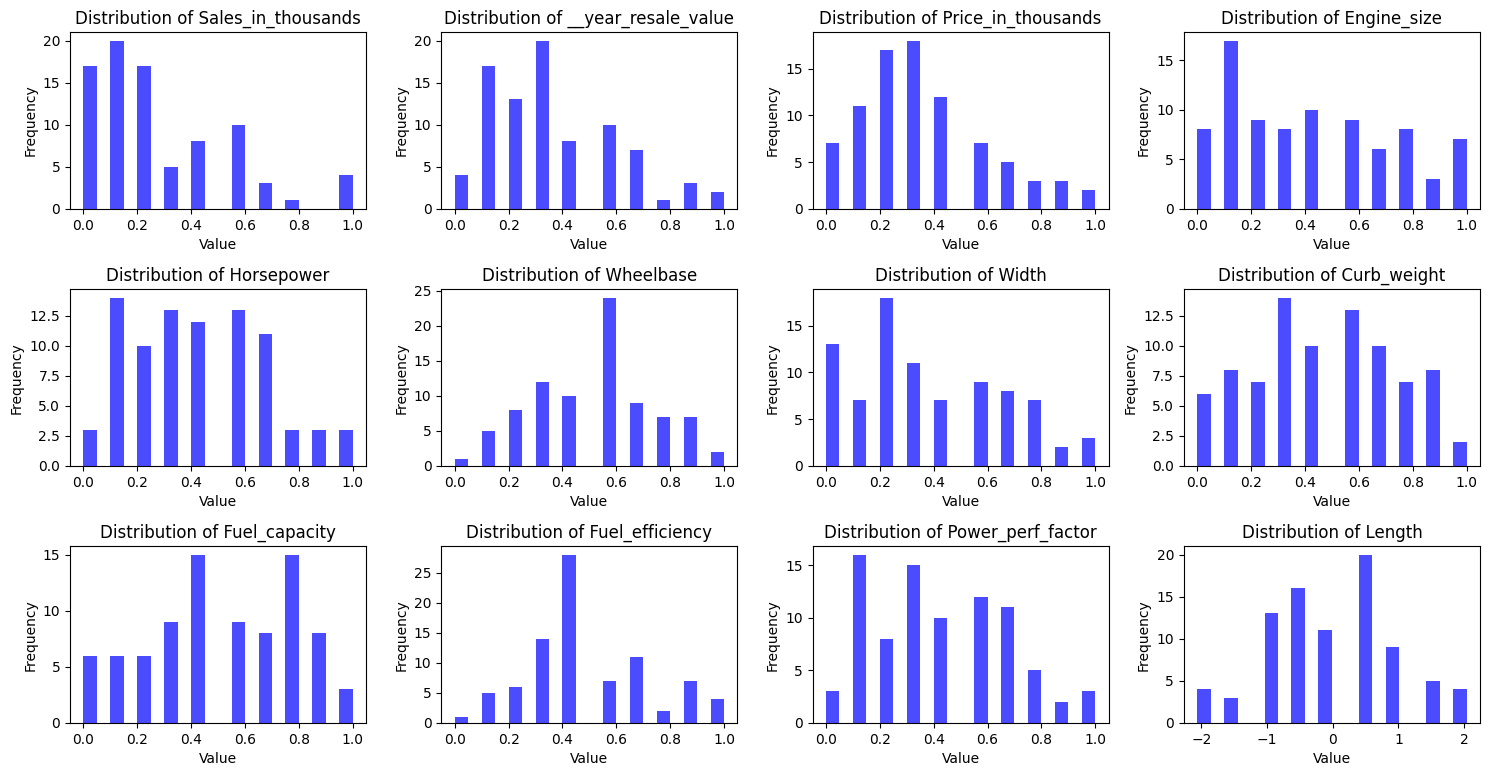

In [31]:
import matplotlib.pyplot as plt

# Plot histograms for each column in the normalized DataFrame
plt.figure(figsize=(15, 10))

# Iterate through each column and plot a histogram
for i, column in enumerate(cdf_normalized.columns):
    plt.subplot(4, 4, i+1)  # Adjust subplot layout based on the number of columns
    plt.hist(cdf_normalized[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## The END!